### Strategy to Boost Supermarket Sales in January

As the manager of a supermarket in Surabaya, I find myself at a crossroads as we step into January. The new year has just begun, and I am eager to understand how my supermarket has been performing. My office is filled with stacks of transaction data from our customers, brimming with numbers, percentages, and seemingly endless combinations of products. Yet, I feel lost amidst the overwhelming data.

The challenge is clear: I need **insights on what is truly happening in my supermarket**. What are the purchasing patterns of my customers? Which products are flying off the shelves, and which ones are barely noticed? More importantly, **how can I use this information to optimize the layout of the store and boost sales this year**?

In January, **the store layout is the first thing I want to focus on**. Customers are navigating through the aisles, but I want to ensure they’re being guided to the right places. I wonder: Should I place complementary products closer together? Should I create specific zones to attract customers? For instance, should shampoos be next to toothpaste or near body soaps? Should snacks and drinks be closer together to encourage impulse buys?

The only thing I have right now is the [raw transaction data](https://raw.githubusercontent.com/michellechandraa/TutorDataMining/refs/heads/main/Supermarket-December-2017.xlsx). It tells me what customers bought, but I need help deciphering it. **Are there certain product combinations that people frequently buy together?** For example, do people who buy detergents also pick up fabric softeners? Do snacks and beverages have a strong pairing trend?

I need your expertise to dig into this data and uncover patterns. Once we understand what products customers often buy together, I can rearrange the store layout to make it more intuitive and appealing. This way, I can improve the shopping experience for my customers while also increasing the chances of cross-selling and boosting sales.

Let’s uncover the story behind the numbers and make data-driven decisions that will set my supermarket up for success in this new year. Help me turn this chaotic dataset into a clear strategy that drives results!

### Grading

1. Understanding the Data (50 points)


*   Key Metrics (0/10/15/25 points): Identifies useful insights, eg: top-selling products, etc.
*   Seasonal Insights (0/10/15/25 points): Explains trends for January, highlighting any seasonal demands or anomalies in customer behavior.
<br>
<br>

2. Recommending Layout Improvements (50 points)

*   Market Basket Analysis Insights (0/10/15/25 points): Uses association rules to determine logical groupings of products.
*   Placement Ideas (0/10/15/25 points): Provides actionable layout changes idea to increase cross-selling opportunities, such as adjusting the location of high-demand complementary items, eg:
If "Shampoo" is frequently bought with "Soap," they should be placed near each other.




## **Import Libraries**

In [82]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.dates as mdates

!pip install mlxtend==0.23.1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## **Loading Dataset**

In [83]:
df = pd.read_excel('https://raw.githubusercontent.com/keziaelice/Dataset/refs/heads/main/Supermarket-December-2017.xlsx')
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,KD_SBR,TP_TRN,KDSUP,KAS,TRN_DK,GDG,GGD,KDSLS,KEL,ITEM,...,DEP_SWA,GON,KONS,POST_STOK,STATUS,TP_ADJ,USER,TANGGAL,JAM,LAMA_CRD
0,IN,JUL,NaN,6.0,K,A,AREA,NaN,KERTAS,39390.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:12:02,NaN
1,IN,JUL,NaN,6.0,K,A,AREA,NaN,BTL/DOT,13108.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:24:51,NaN
2,IN,JUL,NaN,6.0,K,A,AREA,NaN,MUSTIKA,5644.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:28:18,NaN
3,IN,JUL,NaN,6.0,K,A,AREA,NaN,SABUN.C,7273.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:28:22,NaN
4,IN,JUL,NaN,6.0,K,A,AREA,NaN,LULURMD,12168.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:28:20,NaN


## **Exploratory Data Analysis (EDA)**

In [84]:
df.info()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148489 entries, 0 to 148488
Data columns (total 61 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   KD_SBR      148486 non-null  object        
 1   TP_TRN      148486 non-null  object        
 2   KDSUP       40832 non-null   float64       
 3   KAS         136294 non-null  float64       
 4   TRN_DK      148486 non-null  object        
 5   GDG         148486 non-null  object        
 6   GGD         148486 non-null  object        
 7   KDSLS       0 non-null       float64       
 8   KEL         148486 non-null  object        
 9   ITEM        148486 non-null  float64       
 10  NAMA        148486 non-null  object        
 11  BIN         13586 non-null   float64       
 12  KDBIN       0 non-null       float64       
 13  TGL_TRANS   148486 non-null  datetime64[ns]
 14  NO_BKT      148486 non-null  object        
 15  NO_ORD      0 non-null       float64       
 16  ST

In [85]:
df.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
KD_SBR,3
TP_TRN,3
KDSUP,107657
KAS,12195
TRN_DK,3
...,...
TP_ADJ,9413
USER,3
TANGGAL,3
JAM,3


In [86]:
df = df[['KD_SBR', 'TP_TRN', 'KAS', 'TRN_DK', 'GDG', 'GGD', 'KEL', 'ITEM', 'NAMA', 'TGL_TRANS',
         'NO_BKT', 'STS_BYR', 'QTY', 'HRG_OLD', 'HRG_PKK', 'HRG_JUL', 'DISC', 'PPN', 'JLH_TRANS',
         'KET_TRANS', 'TRNBL', 'FILLER', 'TP_ADJ', 'USER', 'JAM']]
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,KD_SBR,TP_TRN,KAS,TRN_DK,GDG,GGD,KEL,ITEM,NAMA,TGL_TRANS,...,HRG_JUL,DISC,PPN,JLH_TRANS,KET_TRANS,TRNBL,FILLER,TP_ADJ,USER,JAM
0,IN,JUL,6.0,K,A,AREA,KERTAS,39390.0,KERTAS KADO SINAR DU,2017-01-02,...,1100.0,0.0,0.0,2200.0,CASH DISCOUNT,N,1.701022e+11,S,MIA,08:12:02
1,IN,JUL,6.0,K,A,AREA,BTL/DOT,13108.0,PIGEON BTL PP RP 240,2017-01-02,...,23000.0,0.0,0.0,23000.0,CASH DISCOUNT,N,1.701029e+11,S,MIA,08:24:51
2,IN,JUL,6.0,K,A,AREA,MUSTIKA,5644.0,MR SEKAR TANJUNG KB,2017-01-02,...,9500.0,0.0,0.0,9500.0,CASH DISCOUNT,N,1.701030e+11,S,MIA,08:28:18
3,IN,JUL,6.0,K,A,AREA,SABUN.C,7273.0,BIORE BF 100ML WHITE,2017-01-02,...,6900.0,0.0,0.0,6900.0,CASH DISCOUNT,N,1.701020e+11,S,MIA,08:28:22
4,IN,JUL,6.0,K,A,AREA,LULURMD,12168.0,OVALE LULUR BALI BEN,2017-01-02,...,13500.0,0.0,0.0,13500.0,CASH DISCOUNT,N,1.701020e+11,S,MIA,08:28:20


In [87]:
df = df.dropna()
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,KD_SBR,TP_TRN,KAS,TRN_DK,GDG,GGD,KEL,ITEM,NAMA,TGL_TRANS,...,HRG_JUL,DISC,PPN,JLH_TRANS,KET_TRANS,TRNBL,FILLER,TP_ADJ,USER,JAM
0,IN,JUL,6.0,K,A,AREA,KERTAS,39390.0,KERTAS KADO SINAR DU,2017-01-02,...,1100.0,0.0,0.0,2200.0,CASH DISCOUNT,N,1.701022e+11,S,MIA,08:12:02
1,IN,JUL,6.0,K,A,AREA,BTL/DOT,13108.0,PIGEON BTL PP RP 240,2017-01-02,...,23000.0,0.0,0.0,23000.0,CASH DISCOUNT,N,1.701029e+11,S,MIA,08:24:51
2,IN,JUL,6.0,K,A,AREA,MUSTIKA,5644.0,MR SEKAR TANJUNG KB,2017-01-02,...,9500.0,0.0,0.0,9500.0,CASH DISCOUNT,N,1.701030e+11,S,MIA,08:28:18
3,IN,JUL,6.0,K,A,AREA,SABUN.C,7273.0,BIORE BF 100ML WHITE,2017-01-02,...,6900.0,0.0,0.0,6900.0,CASH DISCOUNT,N,1.701020e+11,S,MIA,08:28:22
4,IN,JUL,6.0,K,A,AREA,LULURMD,12168.0,OVALE LULUR BALI BEN,2017-01-02,...,13500.0,0.0,0.0,13500.0,CASH DISCOUNT,N,1.701020e+11,S,MIA,08:28:20


In [88]:
df.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
KD_SBR,0
TP_TRN,0
KAS,0
TRN_DK,0
GDG,0
GGD,0
KEL,0
ITEM,0
NAMA,0
TGL_TRANS,0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-89-355541c6fcf0>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour'] = pd.to_datetime(df['JAM']).dt.hour


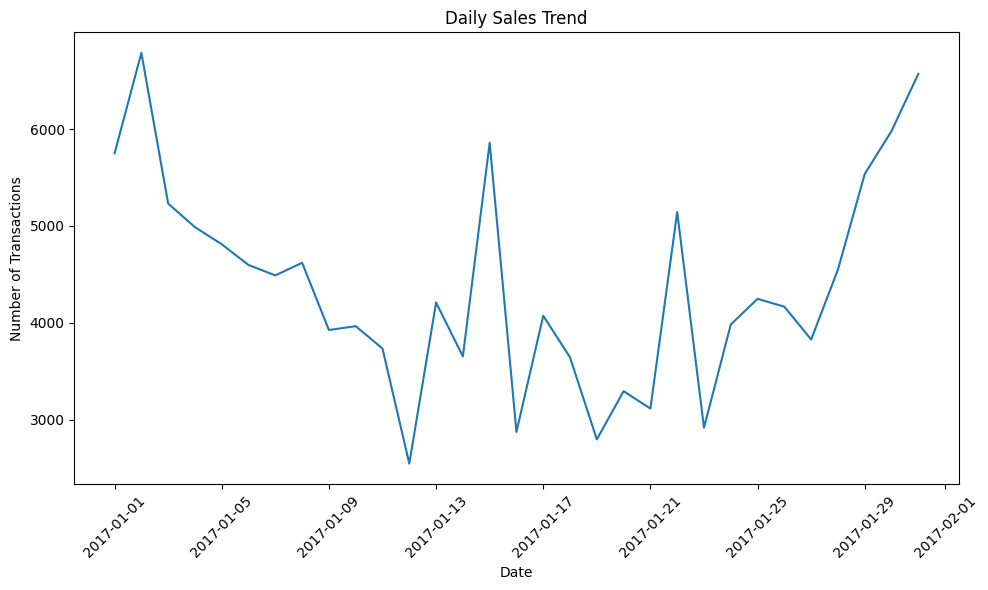

In [89]:
df['TGL_TRANS'] = pd.to_datetime(df['TGL_TRANS']).dt.date
df['hour'] = pd.to_datetime(df['JAM']).dt.hour

daily_transactions = df.groupby('TGL_TRANS').size()

plt.figure(figsize=(10, 6))
plt.plot(daily_transactions.index, daily_transactions.values)
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The daily sales trend in January reveals an initial peak in transactions at the start of the month, likely influenced by New Year's shopping activities. This is followed by a steady decline during the first two weeks, reaching a noticeable low around January 9–13. After mid-January, the trend exhibits sharp fluctuations, with significant spikes observed around January 17 and January 21. Toward the end of the month, transactions increase consistently, reaching another high around January 30–31.

In [90]:
df['day'] = pd.to_datetime(df['TGL_TRANS']).dt.day
df['month'] = pd.to_datetime(df['TGL_TRANS']).dt.month
df['day_name'] = pd.to_datetime(df['TGL_TRANS']).dt.day_name()

df.sample(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,KD_SBR,TP_TRN,KAS,TRN_DK,GDG,GGD,KEL,ITEM,NAMA,TGL_TRANS,...,KET_TRANS,TRNBL,FILLER,TP_ADJ,USER,JAM,hour,day,month,day_name
55936,IN,JUL,7.0,K,A,AREA,OBATPEL,38.0,SUPERPEL RF 800ML RED,2017-01-11,...,CASH DISCOUNT,N,1.701120e+11,S,WULAN,20:39:59,20,11,1,Wednesday
123337,IN,JUL,1.0,K,A,AREA,AMPLOP,6366.0,ANGPAO PDK/[M] [GOLDEN.S],2017-01-27,...,DEBIT CARD,N,1.701275e+11,S,YULIA,19:57:30,19,27,1,Friday
22193,IN,JUL,7.0,K,A,AREA,MIE,20107.0,MIE SARIMI SOTO KOYA J.NPS DUO,2017-01-04,...,CASH DISCOUNT,N,1.701040e+11,S,TIKA,19:25:03,19,4,1,Wednesday
134979,IN,JUL,5.0,K,A,AREA,KOSMETC,13429.0,ELLIPS HM SMOOTH&SHINY,2017-01-30,...,CASH DISCOUNT,N,1.701305e+11,S,YULIA,09:39:11,9,30,1,Monday
113229,IN,JUL,5.0,K,A,AREA,PARFUME,20733.0,PUCELLE C.MIST 150 WAVY OCEAN,2017-01-25,...,CASH DISCOUNT,N,1.701256e+11,S,YUSUF,16:44:20,16,25,1,Wednesday


In [91]:
print(df['day_name'].unique())

['Monday' 'Sunday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday' 'Saturday']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [92]:
aggregated_data = df.groupby(['hour', 'day_name']).size().unstack(fill_value=0)
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
aggregated_data = aggregated_data[order]

aggregated_data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


day_name,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
hour,,,,,,,
8,458,493,311,453,459,317,641
9,1362,1321,857,865,1031,1025,1586
10,1792,1687,1279,1237,1110,1349,2506
11,1727,1483,1328,1260,1039,1034,2241
12,1276,1169,814,731,745,902,1853
13,1248,993,814,679,883,919,1731
14,1435,1089,707,692,688,996,1604
15,1283,1151,865,544,1093,862,1176
16,1339,1611,1169,598,1156,1229,1376


Sundays consistently show higher transaction volumes, with peak activity in the evenings between 6 PM and 8 PM. Weekdays generally have lower sales, with mornings (9 AM–11 AM) being the busiest hours, particularly on Mondays and Tuesdays. Late evenings after 9 PM see minimal activity across all days, while Tuesday evenings show a notable spike, likely due to promotions or shopping preferences.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


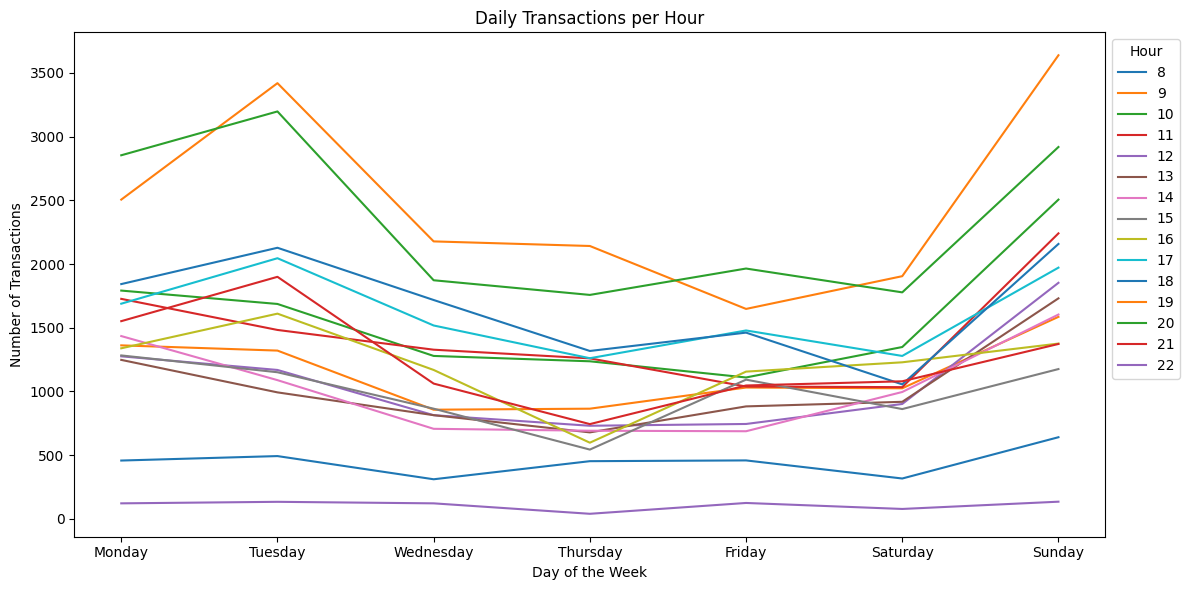

In [93]:
plt.figure(figsize=(12, 6))

for hour in aggregated_data.index:
    plt.plot(aggregated_data.columns, aggregated_data.loc[hour], label=f'{hour}')

plt.title('Daily Transactions per Hour')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Transactions')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Hour')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


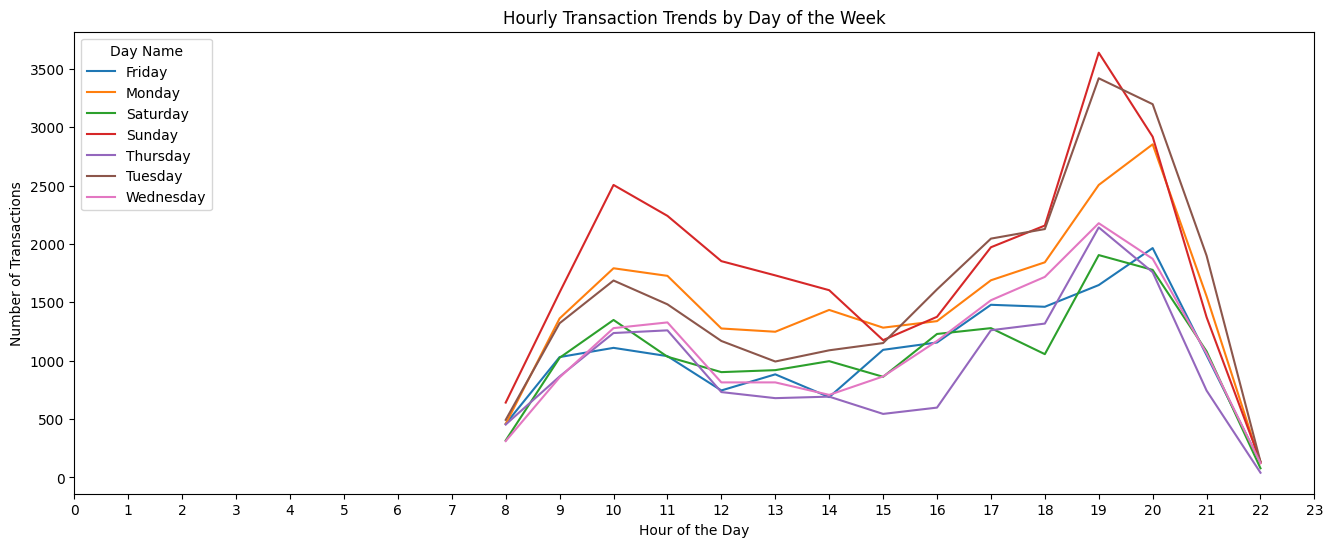

In [94]:
hourly_data = df.groupby(['hour', 'day_name']).size().unstack(fill_value=0)

plt.figure(figsize=(16, 6))
for day in hourly_data.columns:
    plt.plot(hourly_data.index, hourly_data[day], label=day)

plt.title('Hourly Transaction Trends by Day of the Week')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.xticks(range(24))
plt.legend(title="Day Name")
plt.show()

These visualizations shows the number of transactions across different days of the week, broken down by hour. Transaction volumes peak during evening hours (6 PM–8 PM, especially on Sunday) and are generally higher on weekends compared to weekdays, with notable spikes around 10 AM and 7 PM.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


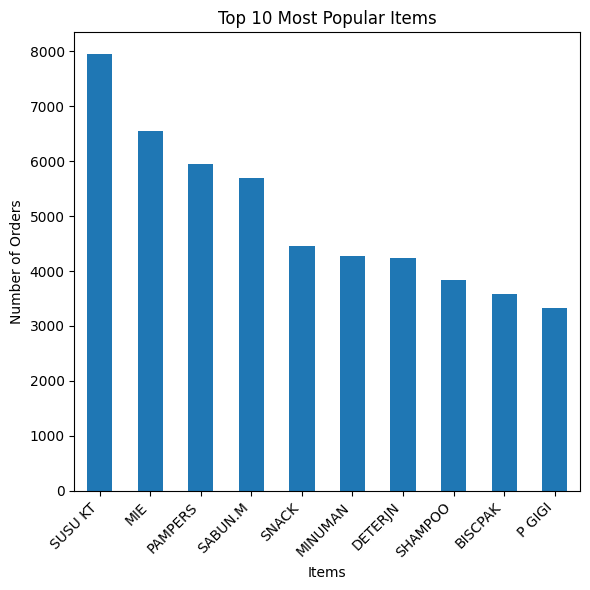

In [95]:
item_counts = df['KEL'].value_counts()

top_items = item_counts.head(10)

plt.figure(figsize=(6, 6))
top_items.plot(kind='bar')

plt.title('Top 10 Most Popular Items')
plt.xlabel('Items')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [96]:
def get_period(hour):
    if 5 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 17:
        return 'afternoon'
    elif 17 <= hour < 21:
        return 'evening'
    else:
        return 'night'

df['period_day'] = df['hour'].apply(get_period)
df.sample(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,KD_SBR,TP_TRN,KAS,TRN_DK,GDG,GGD,KEL,ITEM,NAMA,TGL_TRANS,...,TRNBL,FILLER,TP_ADJ,USER,JAM,hour,day,month,day_name,period_day
108440,IN,JUL,3.0,K,A,AREA,SUSU KM,5251.0,SKM INDOMILK 375GR COKLAT,2017-01-24,...,N,1.701243e+11,S,ANNISA,16:23:47,16,24,1,Tuesday,afternoon
141505,IN,JUL,5.0,K,A,AREA,SABUN.M,24194.0,PAPAYA WHITENING SOAP [KNG]135,2017-01-31,...,N,1.701317e+11,S,YULIA,10:17:47,10,31,1,Tuesday,morning
118750,IN,JUL,7.0,K,A,AREA,SUSU KL,27884.0,CHIL MIL SOYA KLG 600GR,2017-01-26,...,N,1.701263e+11,S,WARE,19:45:28,19,26,1,Thursday,evening
58451,IN,JUL,5.0,K,A,AREA,WARDAH,55624.0,WARDAH CREAMY B.BUTER 50 LAVEN,2017-01-12,...,N,1.701120e+11,S,ANNISA,19:18:20,19,12,1,Thursday,evening
92741,IN,JUL,6.0,K,A,AREA,PAMPERS,40257.0,PAMPERS BABY DRY PANTS L-16,2017-01-20,...,N,1.701209e+11,S,ANNISA,16:48:06,16,20,1,Friday,afternoon


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-97-7b4f946ad362>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=item_counts.index, y=item_counts.values, palette="coolwarm", ax=ax)
<ipython-input-97-7b4f946ad362>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=item_counts.index, y=item_counts.values, palette="coolwarm", ax=ax)
<ipython-input-97-7b4f946ad362>:4: Future

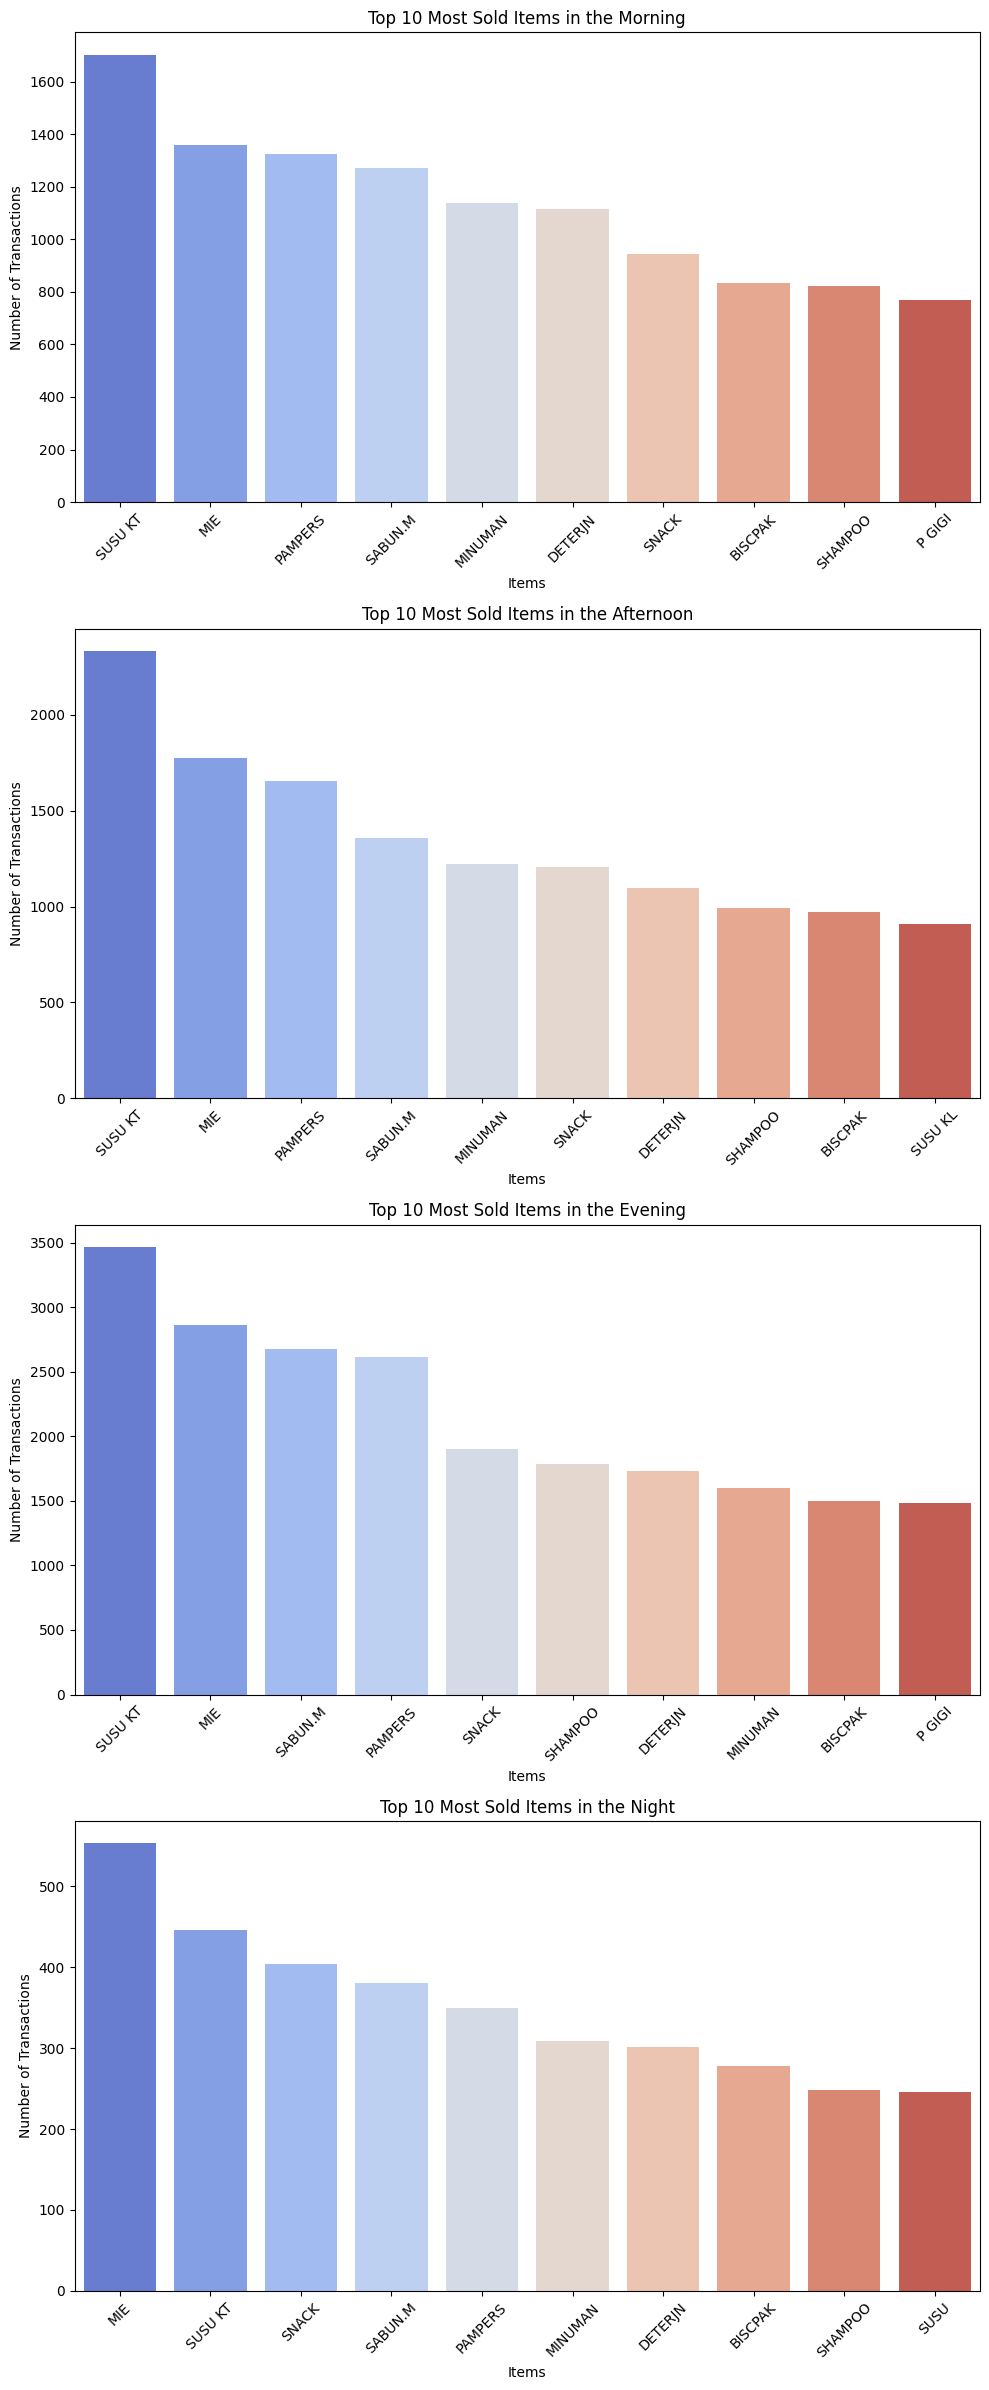

In [97]:
def plot_top_items_by_period(df, period, ax):
    period_data = df[df['period_day'] == period]
    item_counts = period_data['KEL'].value_counts().head(10)
    sns.barplot(x=item_counts.index, y=item_counts.values, palette="coolwarm", ax=ax)
    ax.set_title(f"Top 10 Most Sold Items in the {period.capitalize()}")
    ax.set_xlabel("Items")
    ax.set_ylabel("Number of Transactions")
    ax.tick_params(axis='x', rotation=45)

periods = df['period_day'].unique()
fig, axes = plt.subplots(len(periods), 1, figsize=(10, 6 * len(periods)))

for ax, period in zip(axes, periods):
    plot_top_items_by_period(df, period, ax)

plt.tight_layout()
plt.show()

This visualization highlights the top 10 most sold items across different times of the day: morning, afternoon, evening, and night. Milk (SUSU KT) consistently ranks as the top-selling item during most periods, especially in the morning, afternoon, and evening, reflecting its strong demand. Instant noodles (MIE) also feature prominently throughout the day, particularly at night when it becomes the most purchased item. Other items like soap (SABUN M), baby products (PAMPERS), and snacks (SNACK) maintain steady popularity across all timeframes, showcasing a consistent demand for household and convenience goods.

## **Applying the Apriori Algorithm**

In [98]:
basket = df.groupby(['NO_BKT', 'KEL'])['KEL'].count().unstack().reset_index().fillna(0)

basket = basket.set_index('NO_BKT')
basket = basket.map(lambda x: 1.0 if x > 0 else 0.0)

basket.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


KEL,A BABY,A JAHIT,A TULIS,A.AGAR,A.DAPUR,ABON,ACNES,AGENDA,AIR.M,AKANTOR,...,VAPE,VIVA,WAFER,WAFER.P,WAFERKL,WALLS,WARDAH,WONDERL,WRP LW,ZWITSAL
NO_BKT,,,,,,,,,,,,,,,,,,,,,
010101001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
010101002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
010101003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
010101004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
010101005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [99]:
basket_encoded = basket.applymap(lambda x: 1 if x > 0 else 0)

basket_encoded.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-99-5f2173bca256>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_encoded = basket.applymap(lambda x: 1 if x > 0 else 0)


KEL,A BABY,A JAHIT,A TULIS,A.AGAR,A.DAPUR,ABON,ACNES,AGENDA,AIR.M,AKANTOR,...,VAPE,VIVA,WAFER,WAFER.P,WAFERKL,WALLS,WARDAH,WONDERL,WRP LW,ZWITSAL
NO_BKT,,,,,,,,,,,,,,,,,,,,,
010101001,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
010101002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
010101003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
010101004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
010101005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [100]:
frequent_itemsets = apriori(basket_encoded, min_support=0.02, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.038597,(AIR.M)
1,0.032876,(ASESORS)
2,0.033584,(B DAPUR)
3,0.063941,(BISCPAK)
4,0.024268,(BTL/DOT)
5,0.032735,(COKLAT)
6,0.027015,(DDORANT)
7,0.085349,(DETERJN)
8,0.029082,(GULA)
9,0.021210,(HBL)


In [101]:
rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(SNACK),(BISCPAK),0.068811,0.063941,0.022031,0.320165,5.007216,0.017631,1.376891,0.859426
1,(BISCPAK),(SNACK),0.063941,0.068811,0.022031,0.344553,5.007216,0.017631,1.420692,0.854955
2,(DETERJN),(MIE),0.085349,0.080393,0.023928,0.280358,3.487346,0.017067,1.277868,0.779804
3,(MIE),(DETERJN),0.080393,0.085349,0.023928,0.297640,3.487346,0.017067,1.302254,0.775602
4,(DETERJN),(SOFTENR),0.085349,0.043722,0.028261,0.331121,7.573331,0.024529,1.429674,0.948949
5,(SOFTENR),(DETERJN),0.043722,0.085349,0.028261,0.646373,7.573331,0.024529,2.586487,0.907642
6,(DETERJN),(SUSU KT),0.085349,0.170159,0.024636,0.288653,1.696371,0.010113,1.166577,0.448812
7,(SUSU KT),(DETERJN),0.170159,0.085349,0.024636,0.144783,1.696371,0.010113,1.069496,0.494681
8,(P GIGI),(PAMPERS),0.077646,0.142295,0.021153,0.272429,1.914538,0.010104,1.178861,0.517893
9,(PAMPERS),(P GIGI),0.142295,0.077646,0.021153,0.148657,1.914538,0.010104,1.083410,0.556929


The table reveals key product associations from market basket analysis, highlighting both strong and weak relationships between items. For example, the rule **(SOFTENR) → (DETERJN)** shows an impressive **confidence** of 0.646 and a **lift** of 7.573, indicating a very strong link between these products. Similarly, **(P GIGI) → (SABUN.M)** shows a **lift** of 6.010 and **confidence** of 0.536, suggesting a robust connection. Notably, when **P GIGI** and **SABUN.M** are purchased together, **SHAMPOO** is highly likely to be bought as well, with a **lift** of 7.071. On the other hand, items like **(MIE) → (DETERJN)** and **(PAMPERS) → (SHAMPOO)** show relatively moderate **confidence** and **lift**, indicating potential opportunities for targeted promotions or bundling, though their associations are not as strong as those involving **SOFTENR** and **DETERJN** or **P GIGI** and **SABUN.M**. Overall, the strongest associations provide valuable opportunities for cross-selling, while weaker links may require different strategies or further exploration.

## **Conclusion**

- **January Sales Trend**:  
  - Initial peak at the start of January, likely due to New Year's shopping.
  - Steady decline during the first two weeks, reaching a low from January 9-13.
  - Sharp fluctuations mid-January with significant peaks around January 17 and January 21.
  - Consistent increase in transactions toward the end of the month, peaking around January 30-31.

- **Transaction Volume by Time**:  
  - Sundays and evenings (6 PM–8 PM) show the highest transaction volumes.
  - Peak activity occurs on weekends, with notable spikes around 10 AM and 7 PM.
  - Weekdays generally have lower sales, especially after 9 PM.
  - Tuesday evenings exhibit a notable spike, likely due to promotions.

- **Top-Selling Items**:  
  - **Milk (SUSU KT)**: Consistently top-selling across most times of the day (morning, afternoon, evening).
  - **Instant noodles (MIE)**: Most popular at night, continuing demand throughout the day.
  - **Snacks (SNACK)**, **Soap (SABUN M)**, **Baby products (PAMPERS)**: Consistent popularity across all timeframes.

- **Market Basket Insights**:  
  - Strong associations identified between products like (SOFTENR) and (DETERJN), and (P GIGI) and (SABUN.M) with high confidence and lift. These pairings suggest a strong link between complementary items, guiding logical groupings in the layout.
  - Moderate associations, such as (MIE) and (DETERJN) or (PAMPERS) and (SHAMPOO), also provide valuable insights for potential cross-selling opportunities, though not as robust as the stronger associations.

- **Layout Recommendations**:  
 - High-demand complementary products, such as (SOFTENR) and (DETERJN), should be placed next to each other in the cleaning aisle to encourage customers to purchase both items together.
 - Personal care products like (P GIGI) and (SABUN.M) should be grouped together to increase the likelihood of customers buying both.
 - For products with moderate associations, like (MIE) and (DETERJN) or (PAMPERS) and (SHAMPOO), consider placing them near each other or offering bundle promotions to increase cross-selling.
 - Create themed product zones, such as "Laundry Essentials" or "Personal Care Must-Haves," to make it easier for customers to find related items and boost impulse purchases.